In [3]:

from pathlib import Path
from typing import Final
from argparse import Namespace

import matplotlib.pyplot as plt

import av2.rendering.vector as vector_plotting_utils

from av2.datasets.motion_forecasting import scenario_serialization
from av2.datasets.motion_forecasting.viz.scenario_visualization import (
    visualize_scenario,
)
from av2.map.map_api import ArgoverseStaticMap

_DEFAULT_N_JOBS: Final[int] = -2  # Use all but one CPUs


In [4]:
# path to where the logs live
dataroot = Path.home() /  'code' /  'graph_coverage' / "argoverse_data"/ "motion-forecasting" / "train" 

# unique log identifier
log_id = "69f3a835-119f-48ea-a9a9-ca36c7f63e7f"

In [5]:
args = Namespace(**{"dataroot": Path(dataroot), "log_id": Path(log_id)})

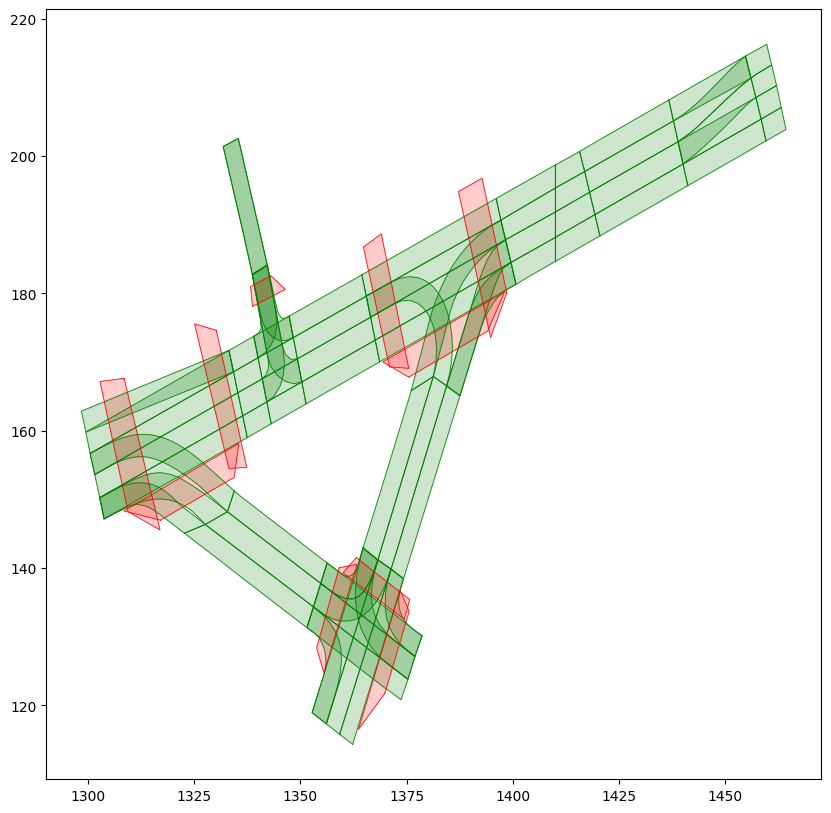

In [6]:

static_map_path = (
    args.dataroot / f"{log_id}" / f"log_map_archive_{log_id}.json"
)
avm = ArgoverseStaticMap.from_json(static_map_path)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

for _, ls in avm.vector_lane_segments.items():
    # right_ln_bnd
    # left_ln_bnd
    vector_plotting_utils.draw_polygon_mpl(
        ax, ls.polygon_boundary, color="g", linewidth=0.5
    )
    vector_plotting_utils.plot_polygon_patch_mpl(
        ls.polygon_boundary, ax, color="g", alpha=0.2
    )

# plot all pedestrian crossings
for _, pc in avm.vector_pedestrian_crossings.items():
    vector_plotting_utils.draw_polygon_mpl(ax, pc.polygon, color="r", linewidth=0.5)
    vector_plotting_utils.plot_polygon_patch_mpl(
        pc.polygon, ax, color="r", alpha=0.2
    )

plt.show()

In [7]:

avm.vector_lane_segments[358010754]

LaneSegment(id=358010754, is_intersection=False, lane_type=<LaneType.BUS: 'BUS'>, right_lane_boundary=Polyline(waypoints=[Point(x=1441.17, y=195.71, z=11.17), Point(x=1453.54, y=200.08, z=11.16), Point(x=1457.52, y=201.52, z=11.13), Point(x=1459.55, y=202.23, z=11.15)]), left_lane_boundary=Polyline(waypoints=[Point(x=1440.03, y=198.86, z=11.22), Point(x=1458.41, y=205.41, z=11.23)]), right_mark_type=<LaneMarkType.NONE: 'NONE'>, left_mark_type=<LaneMarkType.SOLID_WHITE: 'SOLID_WHITE'>, predecessors=[358011508], successors=[358010935], right_neighbor_id=None, left_neighbor_id=358011186)

In [8]:

static_scenario_path = (
    args.dataroot / f"{log_id}" / f"scenario_{log_id}.parquet"
)

scenario = scenario_serialization.load_argoverse_scenario_parquet(static_scenario_path)

In [9]:
scenario.scenario_id


'69f3a835-119f-48ea-a9a9-ca36c7f63e7f'

In [10]:
len(scenario.tracks)

83

In [11]:
len(scenario.timestamps_ns)

110

In [12]:
scenario.tracks[6].object_states[-1]

ObjectState(observed=False, timestep=90, position=(1357.0492650249942, 182.60815546470943), heading=-2.798818601280941, velocity=(-8.4077046637924e-09, -1.5281597911734652e-09))

In [15]:
scenario.tracks[3]

Track(track_id='15211', object_states=[ObjectState(observed=True, timestep=0, position=(1340.2500840090606, 165.59537795359628), heading=0.3365391751389605, velocity=(-1.3281559017435222e-17, -4.3768690567135465e-17)), ObjectState(observed=True, timestep=1, position=(1340.2460809860693, 165.59361469866403), heading=0.33656546775946905, velocity=(-8.147650066727157e-18, -4.0003651541077304e-17)), ObjectState(observed=True, timestep=2, position=(1340.2322409387248, 165.58927714351017), heading=0.3378357384465673, velocity=(-2.3872478781920434e-18, -1.7827494134638125e-17)), ObjectState(observed=True, timestep=3, position=(1340.222442917581, 165.58547951287755), heading=0.33816046278547357, velocity=(-2.7228676290937824e-17, -4.632544524565866e-18)), ObjectState(observed=True, timestep=4, position=(1340.2296877436286, 165.58724332516027), heading=0.33777045946347534, velocity=(1.480333411232165e-06, 7.267204365315948e-07)), ObjectState(observed=True, timestep=5, position=(1340.27449092867

In [20]:
for track in scenario.tracks:
     print(len(track.object_states))

110
110
110
110
110
110
91
99
24
94
32
45
25
41
20
38
98
110
110
43
19
47
110
53
110
47
77
17
21
49
43
84
17
27
16
20
57
68
80
68
13
30
68
24
75
23
50
18
15
12
28
34
51
30
17
20
34
10
50
24
18
37
41
18
40
37
37
29
10
24
29
14
25
19
21
15
12
15
16
14
11
11
110


In [30]:
avm.vector_lane_segments[358010754]

LaneSegment(id=358010754, is_intersection=False, lane_type=<LaneType.BUS: 'BUS'>, right_lane_boundary=Polyline(waypoints=[Point(x=1441.17, y=195.71, z=11.17), Point(x=1453.54, y=200.08, z=11.16), Point(x=1457.52, y=201.52, z=11.13), Point(x=1459.55, y=202.23, z=11.15)]), left_lane_boundary=Polyline(waypoints=[Point(x=1440.03, y=198.86, z=11.22), Point(x=1458.41, y=205.41, z=11.23)]), right_mark_type=<LaneMarkType.NONE: 'NONE'>, left_mark_type=<LaneMarkType.SOLID_WHITE: 'SOLID_WHITE'>, predecessors=[358011508], successors=[358010935], right_neighbor_id=None, left_neighbor_id=358011186)

In [36]:
visualize_scenario(scenario, avm, save_path= (Path.home() /  'code' /  'graph_coverage' / 'scenario.png'))